<div class="alert alert-warning">
<b><font color = black

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv
         

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols       # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm  # For n-way ANOVA

%matplotlib inline

In [2]:
res_DF = pd.read_csv('Fever.csv')

In [3]:
res_DF.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [4]:
res_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
res_DF.dtypes

A              int64
B              int64
Volunteer      int64
Relief       float64
dtype: object

In [19]:
for col in res_DF.drop("Relief",axis=1).columns:
    res_DF[col] = res_DF[col].astype('category',copy=False)

In [22]:
res_DF.dtypes

A            category
B            category
Volunteer    category
Relief        float64
dtype: object

In [23]:
res_DF.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [24]:
res_DF.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [8]:
res_DF.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

In [9]:
res_DF['Relief'].describe()

count    36.000000
mean      7.183333
std       3.272090
min       2.300000
25%       4.675000
50%       6.000000
75%       9.325000
max      13.500000
Name: Relief, dtype: float64

Checking for any outliers data in the relief time

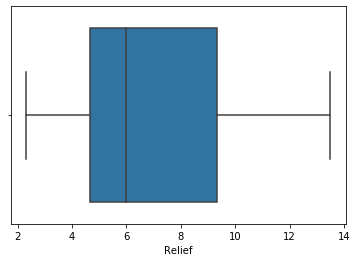

In [10]:
sns.boxplot(res_DF["Relief"]);

From the above 4 steps, we understood that the Tests performed are normally distributed and are homogenoues. Also, that there is no combination of the compounds at any different levels that has outperformed compared to all other combinations

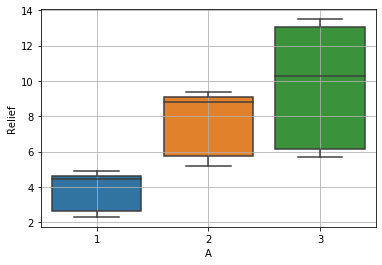

In [11]:
sns.boxplot(x=res_DF['A'],y=res_DF['Relief'])
plt.grid();

It is clearly evident that the compound A when observed at level 3 is giving more relief to the Hay fever than when observed at the other 2 levels.

Also that, Compound A at level 1 is giving relief for approximately the same number of hours across all the test cases while at level 3, the relief time is varying quite significatly among the patients

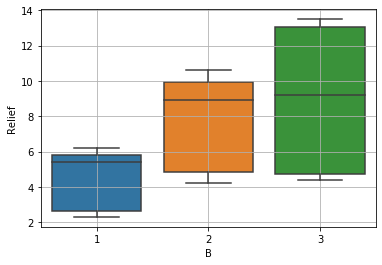

In [12]:
sns.boxplot(x=res_DF['B'],y=res_DF['Relief'])
plt.grid();

In [13]:
for col in res_DF.drop("Relief",axis=1).columns:
    res_DF[col] = res_DF[col].astype('category',copy=False)

In [14]:
res_DF.dtypes

A            category
B            category
Volunteer    category
Relief        float64
dtype: object

<div class="alert alert-success">
<b><font color = black>
1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. 
</font> </b> </div>.

<div class="alert alert-warning">
<b><font color = blue
         
Hypothesis for ingredient A : 
                  
Forming Hypothesis:

𝐻o: Means of all the 3 levels in ingredient A are equal i.e The mean hours of Relief ('Relief') resulted when the patients were observed with each of the 3 different levels of ingredient A are equal. i.e When ingredient A is added at, either of the 3 levels, to the compound, it does not make any difference on the relief time for the Hay fever.

𝐻𝑎: Atleast 1 level of ingredient A gives significantly more hours of relief than the other 2 levels of ingredient A.The mean hours of Relief ('Relief') for at least one level of ingredient A are unequal.

$\textbf{Null-hypothesis}$ ~


$H_0$: $\mu_{A1}$ = $\mu_{A2}$ = $\mu_{A3}$
    
$H_0$: The means between various levels are equal

<br>

$\textbf{Alternative-hypothesis}$ ~ 

$H_1$: $\mu_{A1}$ $\neq$ $\mu_{A2}$ = $\mu_{A3}$
<br>
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;(or)
<br>
$H_1$: $\mu_{A1}$ = $\mu_{A2}$ $\neq$ $\mu_{A3}$ 
<br>
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;(or)
<br>
$H_1$: $\mu_{A1}$ = $\mu_{A3}$ $\neq$ $\mu_{A2}$
<br>
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;(or)
<br>
$H_1$: $\mu_{A1}$ $\neq$ $\mu_{A2}$ $\neq$ $\mu_{A3}$

$H_1$: The means of atleast one level of ingredient A are unequal                              


<div class="alert alert-warning">
<b><font color = blue 
         
Hypothesis for ingredient B : 
                  
Forming Hypothesis:

𝐻o: Means of all the 3 levels in ingredient B are equal i.e The mean hours of Relief ('Relief') resulted when the patients were observed with each of the 3 different levels of ingredient B are equal. i.e When ingredient B is added at, either of the 3 levels, to the compound, it does not make any difference on the relief time for the Hay fever.

𝐻𝑎: Atleast 1 level of ingredient B gives significantly more hours of relief than the other 2 levels of ingredient B.The mean hours of Relief ('Relief') for at least one level of ingredient B are unequal.

$\textbf{Null-hypothesis}$ ~


$H_0$: $\mu_{A1}$ = $\mu_{A2}$ = $\mu_{A3}$
    
$H_0$: The means between various levels of ingredient B are equal

<br>

$\textbf{Alternative-hypothesis}$ ~

$H_1$: $\mu_{B1}$ $\neq$ $\mu_{B2}$ = $\mu_{b3}$
<br>
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;(or)
<br>
$H_1$: $\mu_{B1}$ = $\mu_{B2}$ $\neq$ $\mu_{B3}$ 
<br>
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;(or)
<br>
$H_1$: $\mu_{B1}$ = $\mu_{B3}$ $\neq$ $\mu_{B2}$
<br>
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;(or)
<br>
$H_1$: $\mu_{B1}$ $\neq$ $\mu_{B2}$ $\neq$ $\mu_{B3}$

$H_1$: The means of atleast one level of ingredient B are unequal  



<div class="alert alert-success">
<b><font color = black>
1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.
</font> </b> </div>.


In [15]:
formula = 'Relief ~ C(A)'
model = ols(formula, res_DF).fit()
aov_table1 = anova_lm(model)
print(aov_table1)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


<div class="alert alert-warning">
<b><font color = green
         
Interpretation : Since the p_value obtained from ANOVA analysis for ingredient 'A' is less than $\alpha$ (0.05). We conclude that there is atleast one level of ingredient A that gives more relief from hay fever than the other two levels as we can clearly see that the means of the 3 levels are different

##### If p_value is less than alpha_value, We have evidence to reject the null hypothesis since p value < Level of significance
##### If p_value is greater than alpha_value, We fail to reject the null hypothesis since p value > Level of significance
Since p_value < alpha_value, here we reject the null hypothesis and accept the alternate hypothesis.

<div class="alert alert-success">
<b><font color = black>
1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results
</font> </b> </div>

In [16]:
formula = 'Relief ~ C(B)'
model = ols(formula, res_DF).fit()
aov_table2 = anova_lm(model)
print(aov_table2)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


<div class="alert alert-warning">
<b><font color = green
         
Interpretation : Since the p_value obtained from ANOVA analysis for ingredient 'B' is less than $\alpha$ (0.05). We conclude that there is atleast one level of ingredient B that gives more relief from hay fever than the other two levels as we can clearly see that the means of the 3 levels is different



<div class="alert alert-success">
<b><font color = black>
1.4) Analyse the effects of one variable on another with the help of an interaction plot. 
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]
</font> </b> </div>.


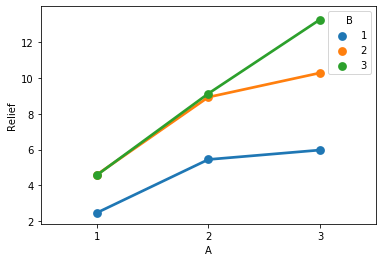

In [17]:
sns.pointplot(x='A', y='Relief', data=res_DF, hue='B', ci=None )

<div class="alert alert-warning">
<b><font color = green
         
Interpretation : Since both lines are non-parallel lines, that means there is interaction effect of the 2 variables.This interaction effect indicates that the relationship between ingredient A and Relief depends on the value of ingredient 'B'. for instance: You get maximum hours of relief , if one use ingredient 'A' at variation level 3 and 'B' at variation level 3. And, hours of relief doesnot differ much when ingredient A is interacted with level 2 and 3 variation for component B.





<div class="alert alert-success">
<b><font color = black>
1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results
</font> </b> </div>.

<div class="alert alert-warning">
<b><font color = blue>

Forming Hypothesis:

𝐻o:  There is no interaction between the 2 ingredients A and B i.e all combinations of various levels of A and B give the same hours of relief
    
𝐻𝑎:  Atleast one of the combinations of A and B levels gives more hours of relief than the other combinations.
    
</font> </b> </div>

In [18]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, res_DF).fit()
aov_table3 = anova_lm(model)
print(aov_table3)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


<div class="alert alert-warning">
<b><font color = green
         
Interpretation : Based on the p-values at a significance level of 0.05 The p-value for A is 1.514043e-29, which indicates that the levels of A leads to different hours of relief. The p-value for B is 3.348751e-26, which indicates that the levels of B leads to different hours of relief. The p-value for the interaction between A*B is 6.972083e-17,which implies that the relationship between A and Relief depends on the value of B.Because the interaction effect between A and B is statistically significant, you cannot interpret the effects of A and B without considering the interaction effect.



